## Cannyエッジ検出(Step1)エッジ強度

In [50]:
import cv2 
import numpy as  np
import matplotlib.pyplot as plt

def Canny_step1(img):

    # Gray scale
    def BGR2GRAY(img):
        b = img[:, :, 0].copy()
        g = img[:, :, 1].copy()
        r = img[:, :, 2].copy()

        # Gray scale
        out = 0.2126 * r + 0.7152 * g + 0.0722 * b
        out = out.astype(np.uint8)
        return out
    
    
    # Gaussian filter for grayscale
    def gaussian_filter(img, K_size=3, sigma=1.3):

        if len(img.shape) == 3:
            H, W, C = img.shape
            gray = False
        else:
            img = np.expand_dims(img, axis=-1)
            H, W, C = img.shape
            gray = True

        ## Zero padding
        pad = K_size // 2
        out = np.zeros([H + pad * 2, W + pad * 2, C], dtype=np.float)
        out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

        ## prepare Kernel
        K = np.zeros((K_size, K_size), dtype=np.float)
        for x in range(-pad, -pad + K_size):
            for y in range(-pad, -pad + K_size):
                K[y + pad, x + pad] = np.exp( - (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
        K /= (2 * np.pi * sigma * sigma)
        K /= K.sum()

        tmp = out.copy()

        # filtering
        for y in range(H):
            for x in range(W):
                for c in range(C):
                    out[pad + y, pad + x, c] = np.sum(K * tmp[y : y + K_size, x : x + K_size, c]) 
                        
        out = np.clip(out, 0, 255)
        out = out[pad : pad + H, pad : pad + W]
        #out = out.astype(np.uint8)

        if gray:
            out = out[..., 0]

        return out
    
    # sobel filter
    def sobel_filter(img, K_size=3):
        if len(img.shape) == 3:
            H, W, C = img.shape
        else:
            #img = np.expand_dims(img, axis=-1)
            H, W = img.shape

        # Zero padding
        pad = K_size // 2
        out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
        out[pad : pad + H, pad : pad + W] = img.copy().astype(np.float)
        tmp = out.copy()

        out_v = out.copy()
        out_h = out.copy()

        ## Sobel vertical
        Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
        ## Sobel horizontal
        Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

        # filtering
        for y in range(H):
            for x in range(W):
                out_v[pad + y, pad + x] = np.sum(Kv * (tmp[y : y + K_size, x : x + K_size]))
                out_h[pad + y, pad + x] = np.sum(Kh * (tmp[y : y + K_size, x : x + K_size]))

        out_v = np.clip(out_v, 0, 255)
        out_h = np.clip(out_h, 0, 255)

        out_v = out_v[pad : pad + H, pad : pad + W].astype(np.uint8)
        out_h = out_h[pad : pad + H, pad : pad + W].astype(np.uint8)

        return out_v, out_h
    
    
    def get_edge_angle(fx, fy):
        # get edge strength
        edge = np.sqrt(np.power(fx, 2) + np.power(fy, 2))
        fx = np.maximum(fx, 1e-5)

        # get edge angle
        angle = np.arctan(fy / fx)

        return edge, angle
    
    def angle_quantization(angle):
        angle = angle / np.pi * 180
        angle[angle < -22.5] = 180 + angle[angle < -22.5]
        _angle = np.zeros_like(angle, dtype=np.uint8)
        _angle[np.where(angle <= 22.5)] = 0
        _angle[np.where((angle > 22.5) & (angle <= 67.5))] = 45
        _angle[np.where((angle > 67.5) & (angle <= 112.5))] = 90
        _angle[np.where((angle > 112.5) & (angle <= 157.5))] = 135
        
        return _angle
    
    
    # grayscale
    gray = BGR2GRAY(img)

    # gaussian filtering
    gaussian = gaussian_filter(gray, K_size=5, sigma=1.4)

    # sobel filtering
    fy, fx = sobel_filter(gaussian, K_size=3)

    # get edge strength, angle
    edge, angle = get_edge_angle(fx, fy)

    # angle quantization
    angle = angle_quantization(angle)

    return edge, angle





True

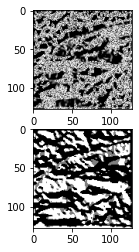

In [51]:
img = cv2.imread("../imori.jpg").astype(np.float32)

# Canny (step1)
edge, angle = Canny_step1(img)

edge = edge.astype(np.uint8)
angle = angle.astype(np.uint8)

# Save result
plt.subplot(2,1,1)
plt.imshow(edge, cmap='gray')

plt.subplot(2,1,2)
plt.imshow(angle, cmap='gray')


cv2.imwrite('out41_edge.jpg', edge)
cv2.imwrite('out41_angle.jpg', angle)


(128, 128)


True

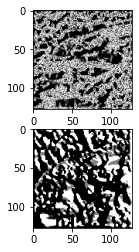

In [48]:
img = cv2.imread('../imori.jpg').astype(np.float32)  # astypeが大事

# Canny(step1)
edge, angle = Canny_step1(img)

edge = edge.astype(np.uint8)
angle = angle.astype(np.uint8)

plt.subplot(2, 1, 1)
plt.imshow(edge, cmap='gray')
plt.subplot(2, 1, 2)
plt.imshow(angle, cmap='gray')

cv2.imwrite('out41_edge.jpg', edge)
cv2.imwrite('out41_angle.jpg', angle)

True

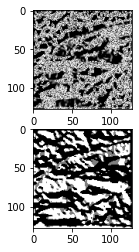

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Canny_step1(img):

	# Gray scale
	def BGR2GRAY(img):
		b = img[:, :, 0].copy()
		g = img[:, :, 1].copy()
		r = img[:, :, 2].copy()

		# Gray scale
		out = 0.2126 * r + 0.7152 * g + 0.0722 * b
		out = out.astype(np.uint8)

		return out


	# Gaussian filter for grayscale
	def gaussian_filter(img, K_size=3, sigma=1.3):

		if len(img.shape) == 3:
			H, W, C = img.shape
			gray = False
		else:
			img = np.expand_dims(img, axis=-1)
			H, W, C = img.shape
			gray = True

		## Zero padding
		pad = K_size // 2
		out = np.zeros([H + pad * 2, W + pad * 2, C], dtype=np.float)
		out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

		## prepare Kernel
		K = np.zeros((K_size, K_size), dtype=np.float)
		for x in range(-pad, -pad + K_size):
			for y in range(-pad, -pad + K_size):
				K[y + pad, x + pad] = np.exp( - (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
		K /= (2 * np.pi * sigma * sigma)
		K /= K.sum()

		tmp = out.copy()

		# filtering
		for y in range(H):
			for x in range(W):
				for c in range(C):
					out[pad + y, pad + x, c] = np.sum(K * tmp[y : y + K_size, x : x + K_size, c]) 
					
		out = np.clip(out, 0, 255)
		out = out[pad : pad + H, pad : pad + W]
		#out = out.astype(np.uint8)

		if gray:
			out = out[..., 0]

		return out


	# sobel filter
	def sobel_filter(img, K_size=3):
		if len(img.shape) == 3:
			H, W, C = img.shape
		else:
			#img = np.expand_dims(img, axis=-1)
			H, W = img.shape

		# Zero padding
		pad = K_size // 2
		out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
		out[pad : pad + H, pad : pad + W] = img.copy().astype(np.float)
		tmp = out.copy()

		out_v = out.copy()
		out_h = out.copy()

		## Sobel vertical
		Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
		## Sobel horizontal
		Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

		# filtering
		for y in range(H):
			for x in range(W):
				out_v[pad + y, pad + x] = np.sum(Kv * (tmp[y : y + K_size, x : x + K_size]))
				out_h[pad + y, pad + x] = np.sum(Kh * (tmp[y : y + K_size, x : x + K_size]))

		out_v = np.clip(out_v, 0, 255)
		out_h = np.clip(out_h, 0, 255)

		out_v = out_v[pad : pad + H, pad : pad + W].astype(np.uint8)
		out_h = out_h[pad : pad + H, pad : pad + W].astype(np.uint8)

		return out_v, out_h


	def get_edge_angle(fx, fy):
		# get edge strength
		edge = np.sqrt(np.power(fx, 2) + np.power(fy, 2))
		fx = np.maximum(fx, 1e-5)

		# get edge angle
		angle = np.arctan(fy / fx)

		return edge, angle


	def angle_quantization(angle):
		angle = angle / np.pi * 180
		angle[angle < -22.5] = 180 + angle[angle < -22.5]
		_angle = np.zeros_like(angle, dtype=np.uint8)
		_angle[np.where(angle <= 22.5)] = 0
		_angle[np.where((angle > 22.5) & (angle <= 67.5))] = 45
		_angle[np.where((angle > 67.5) & (angle <= 112.5))] = 90
		_angle[np.where((angle > 112.5) & (angle <= 157.5))] = 135

		return _angle

	# grayscale
	gray = BGR2GRAY(img)

	# gaussian filtering
	gaussian = gaussian_filter(gray, K_size=5, sigma=1.4)

	# sobel filtering
	fy, fx = sobel_filter(gaussian, K_size=3)

	# get edge strength, angle
	edge, angle = get_edge_angle(fx, fy)

	# angle quantization
	angle = angle_quantization(angle)

	return edge, angle


# Read image
img = cv2.imread("../imori.jpg").astype(np.float32)

# Canny (step1)
edge, angle = Canny_step1(img)

edge = edge.astype(np.uint8)
angle = angle.astype(np.uint8)

# Save result
plt.subplot(2,1,1)
plt.imshow(edge, cmap='gray')

plt.subplot(2,1,2)
plt.imshow(angle, cmap='gray')


cv2.imwrite('out41_edge.jpg', edge)
cv2.imwrite('out41_angle.jpg', angle)
